In [1]:
#load watermark
%load_ext watermark
%watermark -a 'Gopala KR' -u -d -v -p watermark,numpy,matplotlib,nltk,sklearn,tensorflow,theano,mxnet,chainer,seaborn,keras,tflearn,bokeh,gensim

/srv/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using TensorFlow backend.
/srv/venv/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


Gopala KR 
last updated: 2018-02-23 

CPython 3.6.3
IPython 6.2.1

watermark 1.6.0
numpy 1.14.1
matplotlib 2.1.2
nltk 3.2.5
sklearn 0.19.1
tensorflow 1.5.0
theano 1.0.1
mxnet 1.1.0
chainer 3.4.0
seaborn 0.8.1
keras 2.1.4
tflearn n
bokeh 0.12.14
gensim 3.3.0


/srv/venv/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.io.wavfile

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Short-time Fourier Transform (STFT)

Procedure:

* Break audio file into (overlapping) chunks
* Apply a window to each chunk
* Run windowed chunk through the FFT


# Hamming Window

In [3]:
sample_rate = 100 # in samples per second
total_time = 10   # in seconds
t = np.linspace(0, total_time, total_time * sample_rate)
original = [5 for i in t]

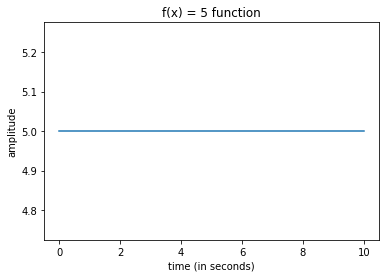

In [4]:
setup_graph(title='f(x) = 5 function', x_label='time (in seconds)', y_label='amplitude')
_ = plt.plot(t, original)

In [5]:
window_size = 100 # 100 points (which is 1 second in this case)
hop_size = window_size // 2

In [6]:
window = scipy.hamming(window_size)

# What the windows look like

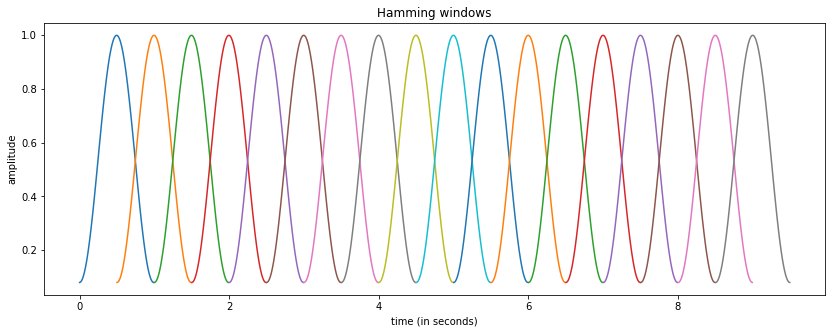

In [7]:
def flatten(lst):
    return [item for sublist in lst for item in sublist]

window_times = [t[i:i+window_size] for i in range(0, len(original)-window_size, hop_size)]
window_graphs = [[wtime, window] for wtime in window_times]
flattened_window_graphs = flatten(window_graphs)

setup_graph(title='Hamming windows', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,5))
_ = plt.plot(*flattened_window_graphs)

# Break up into chunks and apply window

In [8]:
windowed = [window * original[i:i+window_size] for i in range(0, len(original)-window_size, hop_size)]

# Put windowed chunks back together (and compare to original)

### (This is like what the inverse STFT does)

In [9]:
convoluted = scipy.zeros(total_time * sample_rate)
for n,i in enumerate(range(0, len(original)-window_size, hop_size)):
    convoluted[i:i+window_size] += windowed[n]

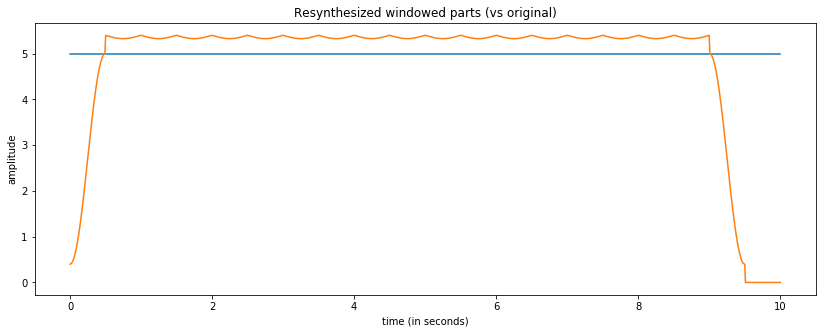

In [10]:
setup_graph(title='Resynthesized windowed parts (vs original)', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,5))
_ = plt.plot(t, original, t, convoluted)

# STFT Code

In [11]:
def stft(input_data, sample_rate, window_size, hop_size):
    window = scipy.hamming(window_size)
    output = scipy.array([scipy.fft(window*input_data[i:i+window_size]) 
                         for i in range(0, len(input_data)-window_size, hop_size)])
    return output

def istft(input_data, sample_rate, window_size, hop_size, total_time):
    output = scipy.zeros(total_time*sample_rate)
    for n,i in enumerate(range(0, len(output)-window_size, hop_size)):
        output[i:i+window_size] += scipy.real(scipy.ifft(input_data[n]))
    return output


# Spectrogram

### The Frequency/Time Uncertainty principle

/srv/venv/lib/python3.6/site-packages/scipy/io/wavfile.py:129: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = numpy.fromstring(fid.read(size), dtype=dtype)


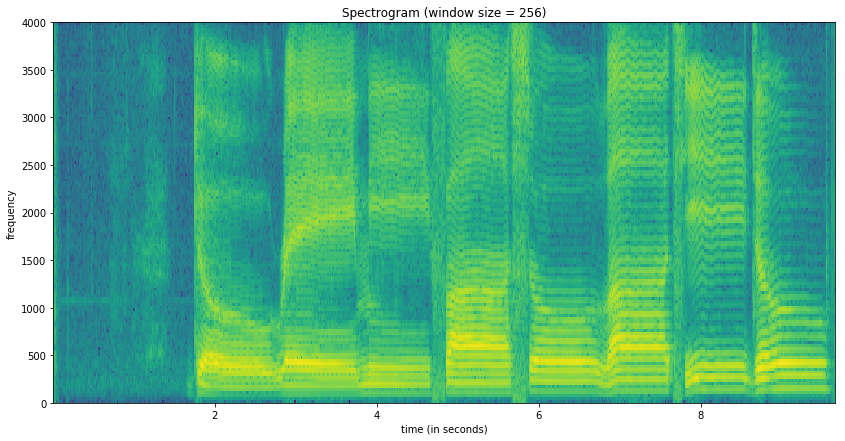

In [12]:
(doremi_sample_rate, doremi) = scipy.io.wavfile.read("audio_files/do-re-mi.wav")
doremi_8000hz = [doremi[i] for i in range(0, len(doremi), 44100//8000)]

setup_graph(title='Spectrogram (window size = 256)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(doremi_8000hz, Fs=8000, NFFT=256)

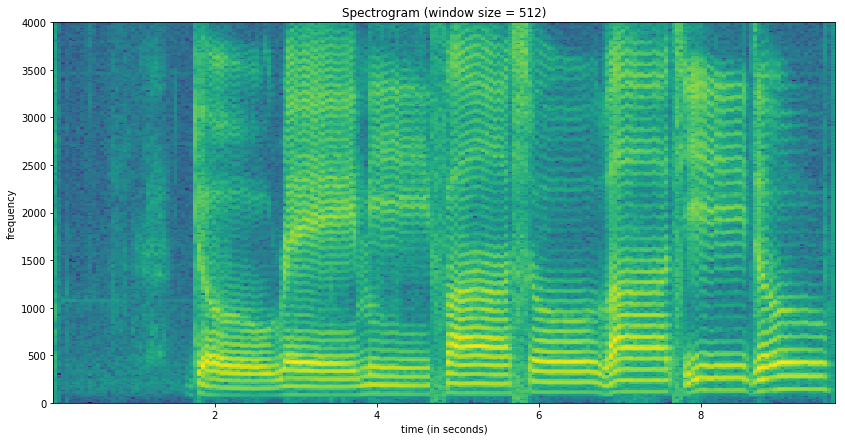

In [13]:
setup_graph(title='Spectrogram (window size = 512)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(doremi_8000hz, Fs=8000, NFFT=512)

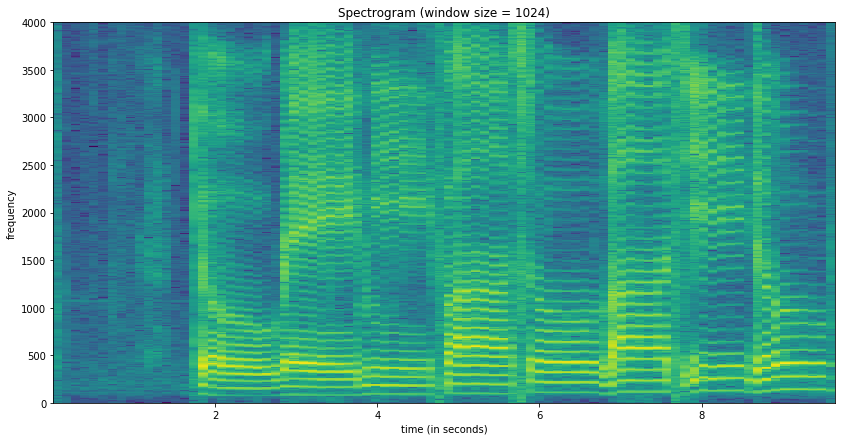

In [14]:
setup_graph(title='Spectrogram (window size = 1024)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(doremi_8000hz, Fs=8000, NFFT=1024)

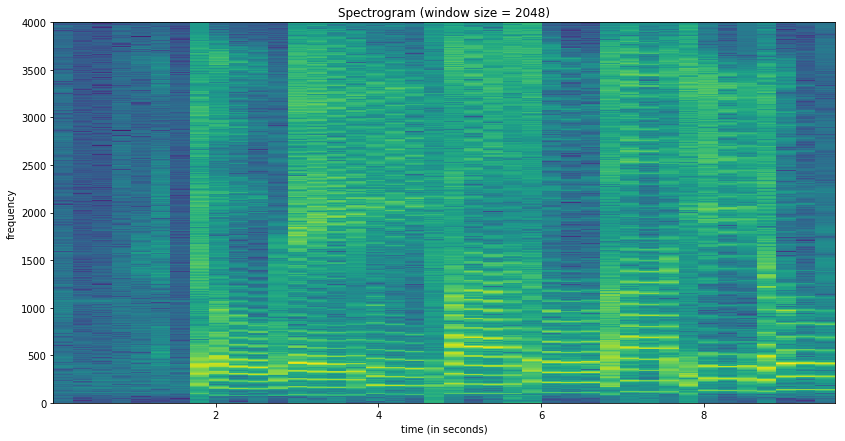

In [15]:
setup_graph(title='Spectrogram (window size = 2048)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(doremi_8000hz, Fs=8000, NFFT=2048)

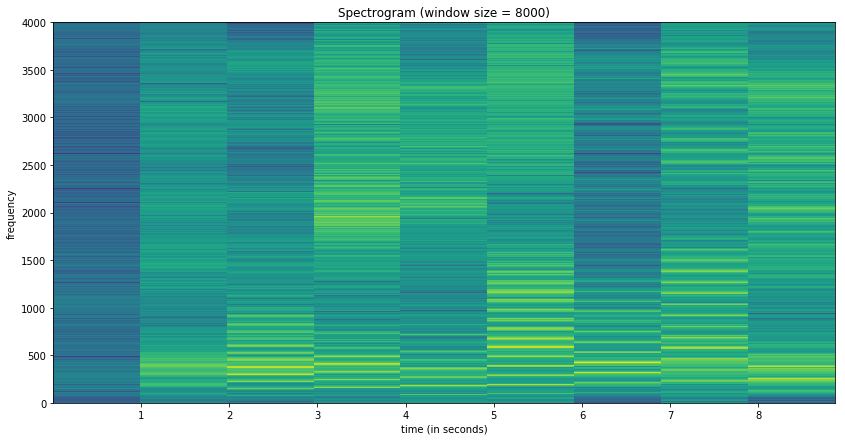

In [16]:
setup_graph(title='Spectrogram (window size = 8000)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(doremi_8000hz, Fs=8000, NFFT=8000)

## Meaning

* So we see that as we take more samples for each FFT, we know more about the frequency
* But since we are taking more samples to represent each "block", the time resolution goes down (since the time block is larger)

## FFT Bin Size

$$fft\ bin\ size = \frac{sample\ rate}{window\ size}$$

* So the larger the window size, the smaller the fft bin size (better frequency resolution)
* And the smaller the window size, the larger the fft bin size (worse frequency resolution)

In [17]:
# Cleanup to reduce notebook size
del doremi, doremi_8000hz, _